In [1]:
%load_ext autoreload
%autoreload 2
from DarkMatter import *
from DarkMatter.Likelihood import PPPCspectra, HDMspectra
from HDMSpectra import HDMSpectra

Welcome to JupyROOT 6.23/01


In [2]:
data = SCRIPT_DIR+"/external/HDMSpectra/data/HDMSpectra.hdf5"

### 1. Check dN/dE

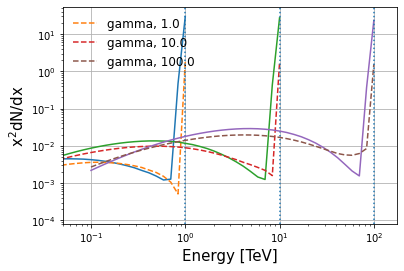

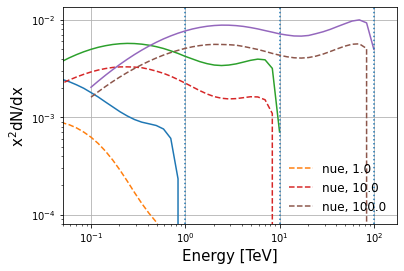

In [5]:
channels = ["gamma", "nue"]
label = [r"$nu_e$", "gamma"]

for channel in channels:
#    initialstate = HDM_Channel2Num[channel]
    c_list = []
    for M in [1000, 10000, 100000]:# dark matter mass in GeV, here 1 EeV
        x = np.logspace(-3.,0.,40) # Energy fraction values, x = 2E/mDM
        finalstate = 22 # pdg id of the photon

        # Extract the spectrum using HDMSpectra.spec


        dNdx_PPPC = PPPCspectra(channel, x, M, return_dNdx=True, useScipy=False)
    #     print("PPPC", M/1e3, dNdx_PPPC[-1])
        etc = plt.plot(x*M/1e3, x**2.*dNdx_PPPC)
        dNdx_HDM, etc = HDMspectra(channel, x, M, return_dNdx=True)
        #print("HDM", M/1e3, dNdx_HDM[-1])
        dNdx_HDM[-1] = etc/x[-1]**2.
        plt.plot(x*M/1e3, x**2.*dNdx_HDM, ls="--", label=f"{channel}, {M/1e3}")
        plt.yscale("log")
        plt.xscale("log")
        plt.xlabel("Energy [TeV]", fontsize=15)
        plt.ylabel("x$^2$dN/dx", fontsize=15)

        plt.axvline(M/1e3, ls=":")
    #    c_list.append([M, etc[0].get_color()])

    #plt.axhline(2, color="k", ls = "-")
    for M, c in c_list:
        plt.plot(0, 0, color=c, label="M = {:.0f} TeV".format(M/1e3))
    plt.legend(frameon=False, fontsize=12)
    plt.xlim(0.05, )
    plt.ylim(8e-5, )
    plt.grid()
    plt.show(block=False)

In [40]:
chan = ["ee", "uu", "tt", "ttbar", "bbar", "WW", "ZZ", "gamma", "nue"]
chan_lab = [r"$e^{+}e^{-}$", r"$\mu^{+}\mu^{-}$", r"$\tau^{+}\tau^{-}$", 
            r"$t\bar{t}$", r"$b\bar{b}$",
            r"$W^{+}W^{-}$", r"$Z^{+}Z^{-}$", r"$\gamma\gamma$", r"$\nu_e \bar{\nu}_e$"]
ls = ["-", "-", "-", "--", "--", ":",":", "-.", "-."]
flx = {}
for c in chan:
    flx[c] = []
    for M in np.logspace(4.5, 9, 50):
        finalstate = 22   # photon
        initialstate = HDM_Channel2Num[c]
        x = np.logspace(-6.,0.,25000)
        
        
        temp, delta = HDMspectra(c, x, M, return_dNdx=True)
        E = x*M
        E = center_pt(E)
        
        total = sum(center_pt(temp)*np.diff(x)*E)+delta*E[-1]
        observable = (E<100000)

        vts = sum((center_pt(temp)*np.diff(x)*E)[observable])
        
        if M < 100000:
            vts+=delta*E[-1]

        flx[c].append([M, total, vts])
    flx[c] = np.asarray(flx[c])    

Negative dN/dx values were set to 0 for the following x:
[0.99448882 0.99503857]
Caution around these values should be taken
A comparison with linear interpolation is recommended
Negative dN/dx values were set to 0 for the following x:
[0.99613898 0.99668964]
Caution around these values should be taken
A comparison with linear interpolation is recommended
Negative dN/dx values were set to 0 for the following x:
[0.99668964 0.9972406 ]
Caution around these values should be taken
A comparison with linear interpolation is recommended


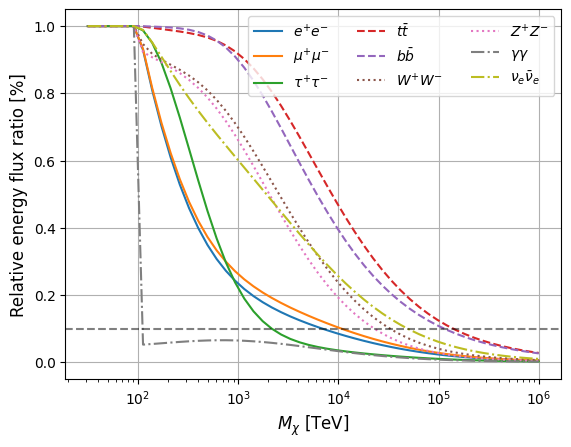

In [41]:
for c, cl, l in zip(chan, chan_lab, ls):
    plt.plot(flx[c][:,0]/1000., flx[c][:,2]/flx[c][:,1], label=cl, ls=l)
    data = np.asarray([flx[c][:,0]/1000., flx[c][:,2]/flx[c][:,1]]).T
    np.save(f"e_ratio_{c}", data)
plt.xscale("log")
#plt.yscale("log")
plt.axhline(0.1, color="k", ls="--", alpha=0.5)
plt.grid()
plt.legend(fontsize=10, ncol=3)
plt.xlabel("$M_{\chi}$ [TeV]", fontsize=12)
plt.ylabel("Relative energy flux ratio [%]", fontsize=12)
plt.ylim(-0.05,)
plt.savefig("ratio.pdf")

In [7]:
plt.style.use("default")

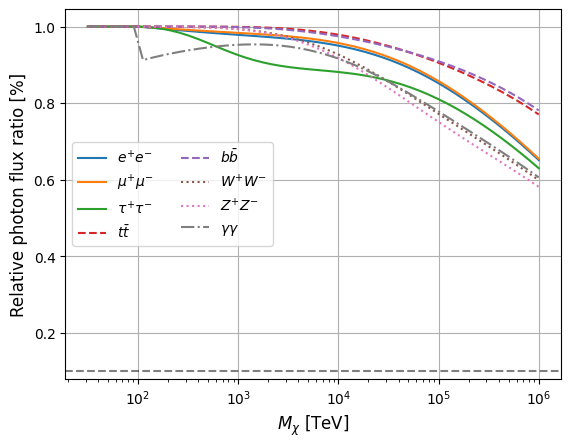

In [48]:
for c, cl, l in zip(chan, chan_lab, ls):
    plt.plot(flx[c][:,0]/1000., flx[c][:,2]/flx[c][:,1], label=cl, ls=l)
plt.xscale("log")
#plt.yscale("log")
plt.axhline(0.1, color="k", ls="--", alpha=0.5)
plt.grid()
plt.legend(fontsize=10, ncol=2)
plt.xlabel("$M_{\chi}$ [TeV]", fontsize=12)
plt.ylabel("Relative photon flux ratio [%]", fontsize=12)
plt.ylim(0.08,)
plt.savefig("ratio_cnt.pdf")

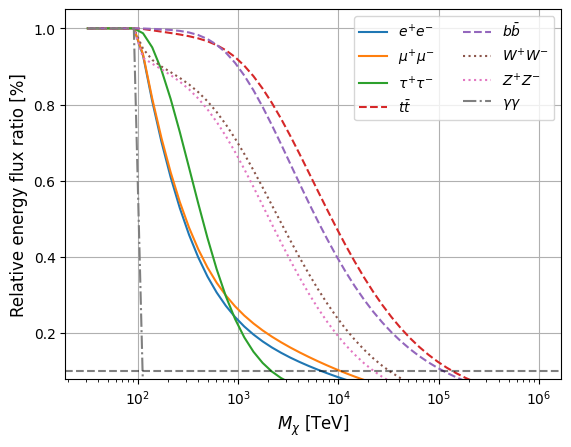

In [45]:
for c, cl, l in zip(chan, chan_lab, ls):
    plt.plot(flx[c][:,0]/1000., flx[c][:,2]/flx[c][:,1], label=cl, ls=l)
plt.xscale("log")
#plt.yscale("log")
plt.axhline(0.1, color="k", ls="--", alpha=0.5)
plt.grid()
plt.legend(fontsize=10, ncol=2)
plt.xlabel("$M_{\chi}$ [TeV]", fontsize=12)
plt.ylabel("Relative energy flux ratio [%]", fontsize=12)
plt.ylim(0.08,)
plt.savefig("ratio.pdf")

In [43]:
chan = ["ee", "uu", "tt", "ttbar", "bbar", "WW", "ZZ", "gamma", "nue"]
chan_lab = [r"$e^{+}e^{-}$", r"$\mu^{+}\mu^{-}$", r"$\tau^{+}\tau^{-}$", 
            r"$t\bar{t}$", r"$b\bar{b}$",
            r"$W^{+}W^{-}$", r"$Z^{+}Z^{-}$", r"$\gamma\gamma$", r"$\nu_e \bar{\nu}_e$"]
ls = ["-", "-", "-", "--", "--", ":",":", "-.", "-.", "-."]
flx = {}
for c in chan:
    flx[c] = []
    for M in np.logspace(4.5, 9, 50):
        x = np.logspace(-6.,0.,100000)    
        temp, delta = HDMspectra(c, x, M)

        E = x*M

        observable = (center_pt(E)<100000)

        vts = sum((center_pt(temp)*np.diff(E))[observable])
        
        
        if M < 100000:
            if c == "gamma":
                print(M, vts, delta, delta/(vts+delta)*100)

            vts+=delta


        flx[c].append([M, total/(8*np.pi*pow(M, 2)), vts/(8*np.pi*pow(M, 2))])
    flx[c] = np.asarray(flx[c])    

Negative dN/dx values were set to 0 for the following x:
[0.99448898 0.99462639 0.99476381 0.99490125 0.99503871 0.9951762
 0.99531369]
Caution around these values should be taken
A comparison with linear interpolation is recommended
Negative dN/dx values were set to 0 for the following x:
[0.99586388 0.99600148 0.99613909 0.99627672 0.99641438 0.99655205
 0.99668974 0.99682744 0.99696517 0.99710292]
Caution around these values should be taken
A comparison with linear interpolation is recommended
Negative dN/dx values were set to 0 for the following x:
[0.99641438 0.99655205 0.99668974 0.99682744 0.99696517 0.99710292
 0.99724068]
Caution around these values should be taken
A comparison with linear interpolation is recommended
Negative dN/dx values were set to 0 for the following x:
[0.99972373 0.99986185]
Caution around these values should be taken
A comparison with linear interpolation is recommended
Negative dN/dx values were set to 0 for the following x:
[0.99972373 0.99986185]
Cau

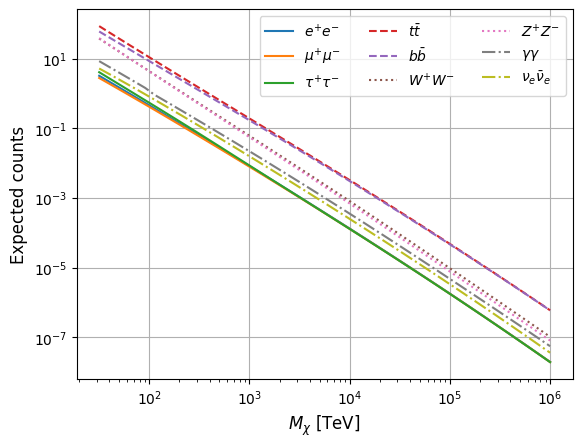

In [44]:
t = 50*3600
signu = 10**-23
eff = 1e6*1e4
j_f = 1e18
for c, cl, l in zip(chan, chan_lab, ls):
    plt.plot(flx[c][:,0]/1000., flx[c][:,2]*t*signu*eff*j_f, label=cl, ls=l)
    data = np.asarray([flx[c][:,0]/1000., flx[c][:,2]*t*signu*eff*j_f]).T
    np.save(f"counts_{c}", data)
plt.xscale("log")
plt.yscale("log")
#plt.axhline(0.1, color="k", ls="--", alpha=0.5)
plt.grid()
plt.legend(fontsize=10, ncol=3)
plt.xlabel("$M_{\chi}$ [TeV]", fontsize=12)
plt.ylabel("Expected counts", fontsize=12)
#plt.ylim(0,10)
plt.savefig("ratio_cnt.pdf")

### 2. Check expected count spectra

In [30]:
dwarf = "ursa_minor"
jSeed = defaultNum[dwarf]
package="EventDisplay"
channel ="gamma"

jProfile = JProfile.generateConvolvedJ(dwarf, seed=defaultNum[dwarf], return_array=True, save_root=False)

  0%|          | 0/30 [00:00<?, ?it/s]

In [187]:
hg_1d_PPPC = Likelihood.combinedCalcSignal(dwarf, M, package, 
                                      channel=channel, 
                                      ext=True, useBias=True, 
                                      jArray=True, jProfile=jProfile, verbose=True)

hg_1d_HDM = Likelihood.combinedCalcSignal(dwarf, M, package, 
                                      channel=channel, DM_spectra="HDM",
                                      ext=True, useBias=True, 
                                      jArray=True, jProfile=jProfile, verbose=True)

[Log] Importing the IRFs (segue_1, EventDisplay, all).
[Log] Importing the DM spectrum (channel: uu).
[Log] Generating the signal spectrum.
[Log] Done.
[Log] Importing the IRFs (segue_1, EventDisplay, all).
[Log] Importing the DM spectrum (channel: uu).
[Log] Generating the signal spectrum.
[Log] Done.


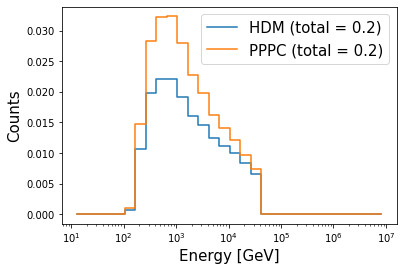

In [188]:
x1, y1 = getArray(hg_1d_HDM)
x2, y2 = getArray(hg_1d_PPPC)
plt.step(x1, y1, where="mid", label="HDM (total = {:.1f})".format(sum(y1)))
plt.step(x2, y2, where="mid", label="PPPC (total = {:.1f})".format(sum(y2)))
plt.xscale("log")
plt.xlabel("Energy [GeV]", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.legend(fontsize=15)

### 3. Check an upper limit

In [189]:
dwarf = "segue_1"
M = 100000
channel = "uu"
mle_1d = Likelihood.MLE(dwarf, M, channel=channel,
                     package=package,
                     addTheta=False, 
                     averagedIRF=True,
                     ext=True,
                     useBias=True,
                     jArray=True,
                     jSeed=jSeed,
                     version="all",
                     method=2,
                     verbose=True) 
mle_1d.minuit()

[Log] Initializing... (EventDisplay)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.
[Log] Step 3: A source model is loaded.
[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.
[0.1763312046242215]
[Log, Result] TS = -0.00 (M=100000 GeV)
[Log, Result] <σν> (95& upper limit) = 10^(-21.289) (equivalent to 5.15e-22)
[Log, Result] b = 15246 +/- 161 (null value: 15246)
[Log, Result] N_on = 2634, N_off = 2660, N_dm = 0


In [190]:
dwarf = "segue_1"
M = 100000
channel = "uu"
mle_1d = Likelihood.MLE(dwarf, M, channel=channel,
                     package=package,
                     addTheta=False, 
                     averagedIRF=True,
                     ext=True,
                     useBias=True,
                     jArray=True,
                     jSeed=jSeed,
                     version="all",
                     method=2,
                     DM_spectra="HDM",
                     verbose=True) 
mle_1d.minuit()

[Log] Initializing... (EventDisplay)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.
[Log] Step 3: A source model is loaded.
[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.
[0.13453246575881195]
[Log, Result] TS = -0.00 (M=100000 GeV)
[Log, Result] <σν> (95& upper limit) = 10^(-21.179) (equivalent to 6.62e-22)
[Log, Result] b = 15246 +/- 161 (null value: 15246)
[Log, Result] N_on = 2634, N_off = 2660, N_dm = 0


Warning in <TMinuit::Contour>: Returning a TGraph with 30 points only


## 4. Calculate the upper limit curve

In [216]:
dwarf = "segue_1"
channel = "tt"

filename="EventDisplay_segue_1_tt_1D_HDM"
#filename = None
M = np.logspace(2.3,6, 20)

OUTPUT = Likelihood.calcUpperLimits(dwarf, channel, package=package, method=2, filename=filename, mass=M,
                        averagedIRF=True, bkgModel="ex", statistic="unbinned", DM_spectra="HDM",
                        jArray=True, jSeed=jSeed, addTheta=False, version="all", ext=True, 
                        useBias=True, returnMLE=True)

[Log] Package      : EventDisplay
[Log] Dwarf        : segue_1
[Log] Channel      : tt
[Log] Dataset      : Extended
[Log] Dimention    : 1
[Log] Background   : Extrapolation (ex)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 1000 GeV
[Log] Maximum mass : 1000 TeV


  0%|          | 0/17 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_segue_1_tt_1D_HDM.npy'


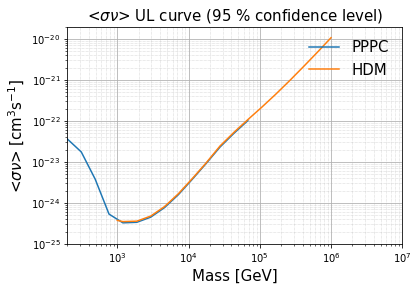

In [219]:
Likelihood.plotULcurve("EventDisplay_segue_1_tt_1D_ex", label="PPPC")
Likelihood.plotULcurve("EventDisplay_segue_1_tt_1D_HDM", label="HDM")
plt.ylim(1e-25, 2e-20)
plt.xlim(200, 1e7)
plt.legend(loc=1, fontsize=15, frameon=False)

In [31]:
dwarf="ursa_minor"

M=const.mass4gamma[12]
channel = "gamma"
hg_1d_PPPC = Likelihood.combinedCalcSignal(dwarf, M, 
                                      channel=channel, 
                                      ext=True, useBias=True, 
                                      jArray=True, jProfile=jProfile, verbose=True)

hg_1d_HDM = Likelihood.combinedCalcSignal(dwarf, M, 
                                      channel=channel, DM_spectra="HDM",
                                      ext=True, useBias=True, 
                                      jArray=True, jProfile=jProfile, verbose=True)

hg_1d_delta = Likelihood.combinedCalcSignal(dwarf, M, 
                                      channel="delta", 
                                      ext=True, useBias=True, 
                                      jArray=True, jProfile=jProfile, verbose=True)

[Log] Importing the IRFs (ursa_minor, EventDisplay, all).
[Log] Importing the DM spectrum (channel: gamma).
[Log] Generating the signal spectrum.
[Log] Done.
[Log] Importing the IRFs (ursa_minor, EventDisplay, all).
[Log] Importing the DM spectrum (channel: gamma).
[Log] Generating the signal spectrum.
[Log] Done.
[Log] Importing the IRFs (ursa_minor, EventDisplay, all).
[Log] Importing the DM spectrum (channel: delta).
[Log] Generating the signal spectrum.
[Log] Done.


In [33]:
x, y = getArray(hg_1d_HDM)

In [35]:
sum(y)

32.59435381261178

In [36]:
max(y)

31.229210427710477

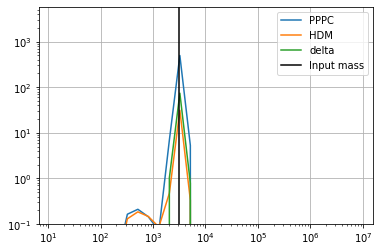

In [32]:
plt.plot(*getArray(hg_1d_PPPC), label="PPPC")
plt.plot(*getArray(hg_1d_HDM), label="HDM")
plt.plot(*getArray(hg_1d_delta), label="delta")
plt.xscale("log")
plt.yscale("log")
plt.axvline(const.mass4gamma[12], color="k", label="Input mass")
plt.legend()
plt.ylim(1e-1,)
plt.grid()